In [ ]:
import pandas_datareader as pdr
key=""

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

ValueError: The tiingo API key must be provided either through the api_key variable or through the environmental variable TIINGO_API_KEY.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_price_prediction/aapl_raw_data.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900,0.0992,NaN,NaN
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,785200,0.0941,-5.14,NaN
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,472000,0.0871,-7.44,NaN
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,385900,0.0893,2.53,NaN
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,327900,0.0919,2.91,NaN


In [ ]:
df.tail()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
10920,2024-04-09,168.70,170.08,168.35,169.67,42451200,169.67,0.72,61247170.00
10921,2024-04-10,168.80,169.09,167.11,167.78,49709300,167.78,-1.11,60741365.00
10922,2024-04-11,168.34,175.46,168.16,175.04,91070300,175.04,4.33,62670445.00
10923,2024-04-12,174.26,178.36,174.21,176.55,101593300,176.55,0.86,64104435.00
10924,2024-04-15,175.38,176.63,172.50,172.69,73096917,172.69,-2.19,61676045.85


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1.shape

(10925,)

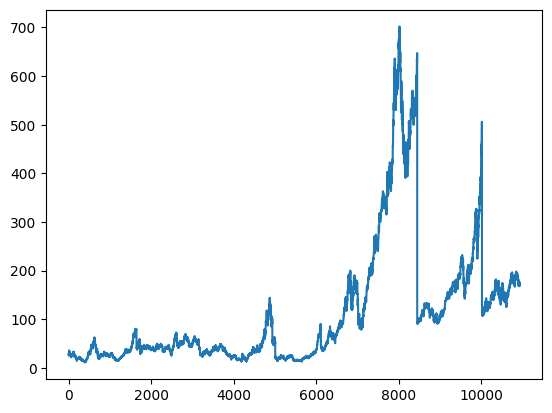

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.02567032],
       [0.02353113],
       [0.02061405],
       ...,
       [0.23736249],
       [0.23954741],
       [0.23396213]])

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [ ]:
training_size, test_size

(7101, 3824)

In [ ]:
import numpy

def create_dataset(dataset, time_step=1):
  dataX, dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])

  return numpy.array(dataX),numpy.array(dataY)

In [ ]:
time_step=100
X_train, y_train= create_dataset(train_data, time_step)
X_test,y_test=create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7000, 100)
(7000,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(3723, 100)
(3723,)


In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import LSTM, Dense, Dropout




In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1), kernel_initializer=glorot_uniform()))
model.add(Dropout(0.2))  # Adding dropout for regularization
model.add(LSTM(50, return_sequences=False, kernel_initializer=glorot_uniform()))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer=glorot_uniform()))
model.compile(loss='mean_squared_error',optimizer='adam')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.1794e-05 - val_loss: 4.6202e-04
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.8127e-05 - val_loss: 5.1042e-04
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 2.5656e-05 - val_loss: 3.6971e-04
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 2.8069e-05 - val_loss: 8.1035e-04
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.5483e-05 - val_loss: 4.9571e-04
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4889e-05 - val_loss: 4.2657e-04
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.7305e-05 - val_loss: 3.8184e-04
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4612e-05 - val_loss: 4.3079e-04
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 2.4833e-05 - val_loss: 8.0767e-04
Epoch 10/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.7843e-05 - val_loss: 5.4971e-04
Epoch 11/100
110/110 ━━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

53.48396581445463

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

262.2427694956811

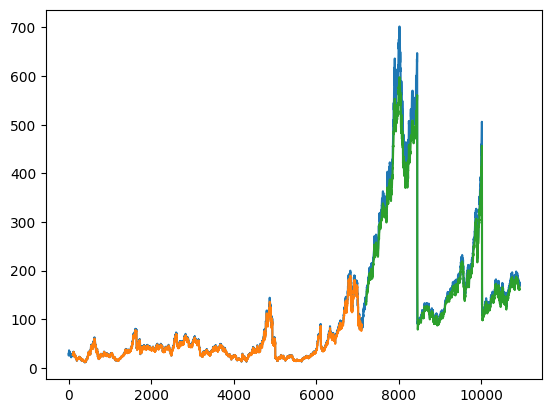

In [ ]:
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict), :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 3483)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=3482
i=0
while(i<30):
    if(len(temp_input)>100):
      x_input=np.array(temp_input[1:])
      print("{} day input {}".format(i,x_input))
      x_input=x_input.reshape(1,-1)
      x_input=x_input.reshape(1,n_steps,1)

      y_hat=model.predict(x_input,verbose=0)
      print("{} day output {}".format(i,y_hat))
      temp_input.extend(y_hat[0].tolist())
      temp_input=temp_input[1:]

      lst_output.extend(y_hat.tolist())
      i=i+1

    else:
      x_input=x_input.reshape((1,n_steps,1))
      y_hat=model.predict(x_input,verbose=0)
      print(y_hat[0])
      temp_input.extend(y_hat[0].tolist())
      i=i+1

print(lst_output)





0 day input [0.35984637 0.37078542 0.3774704  ... 0.23736249 0.23954741 0.23396213]
0 day output [[0.2219528]]
1 day input [0.37078542 0.3774704  0.38065488 ... 0.23954741 0.23396213 0.2219528 ]
1 day output [[0.21230075]]
2 day input [0.3774704  0.38065488 0.37501114 ... 0.23396213 0.2219528  0.21230075]
2 day output [[0.20405939]]
3 day input [0.38065488 0.37501114 0.38033887 ... 0.2219528  0.21230075 0.20405939]
3 day output [[0.19645956]]
4 day input [0.37501114 0.38033887 0.37616987 ... 0.21230075 0.20405939 0.19645956]
4 day output [[0.18933895]]
5 day input [0.38033887 0.37616987 0.37331761 ... 0.20405939 0.19645956 0.18933895]
5 day output [[0.18268085]]
6 day input [0.37616987 0.37331761 0.36999133 ... 0.19645956 0.18933895 0.18268085]
6 day output [[0.17644194]]
7 day input [0.37331761 0.36999133 0.37230474 ... 0.18933895 0.18268085 0.17644194]
7 day output [[0.17055207]]
8 day input [0.36999133 0.37230474 0.35475363 ... 0.18268085 0.17644194 0.17055207]
8 day output [[0.1649

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

10925

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)

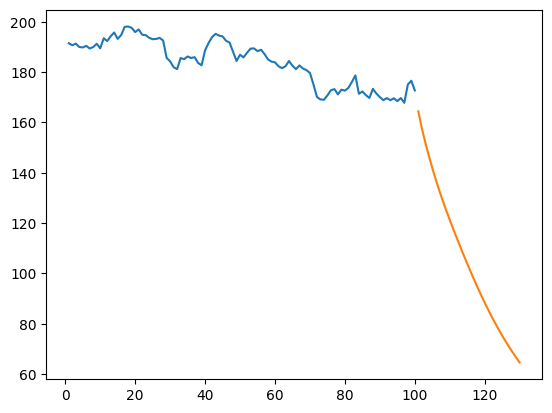

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[10825:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

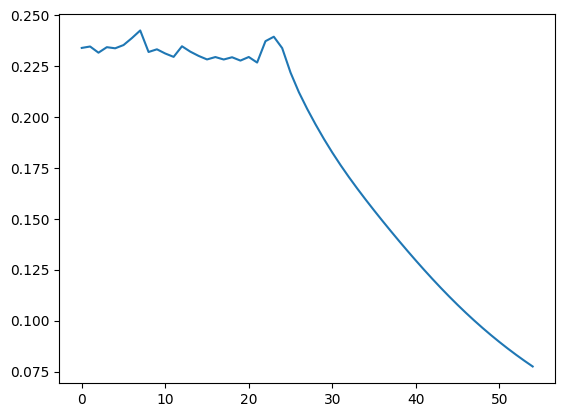

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[10900:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

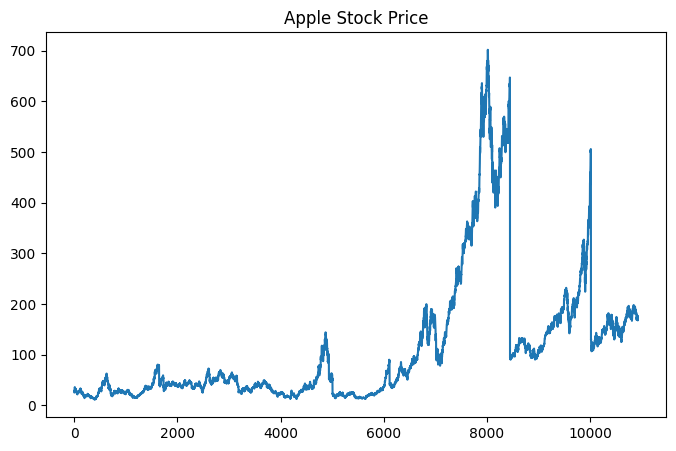

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 8.7147e-04 - val_loss: 0.0018
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 8.3341e-05 - val_loss: 0.0016
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 7.6921e-05 - val_loss: 0.0028
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.3113e-05 - val_loss: 0.0021
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 6.1262e-05 - val_loss: 0.0013
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 5.4714e-05 - val_loss: 0.0021
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 5.2023e-05 - val_loss: 0.0013
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 4.8829e-05 - val_loss: 9.3089e-04
Epoch 9/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.1778e-05 - val_loss: 0.0011
Epoch 10/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 5.0560e-05 - val_loss: 9.7018e-04
Epoch 11/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0873e-05 - val_los

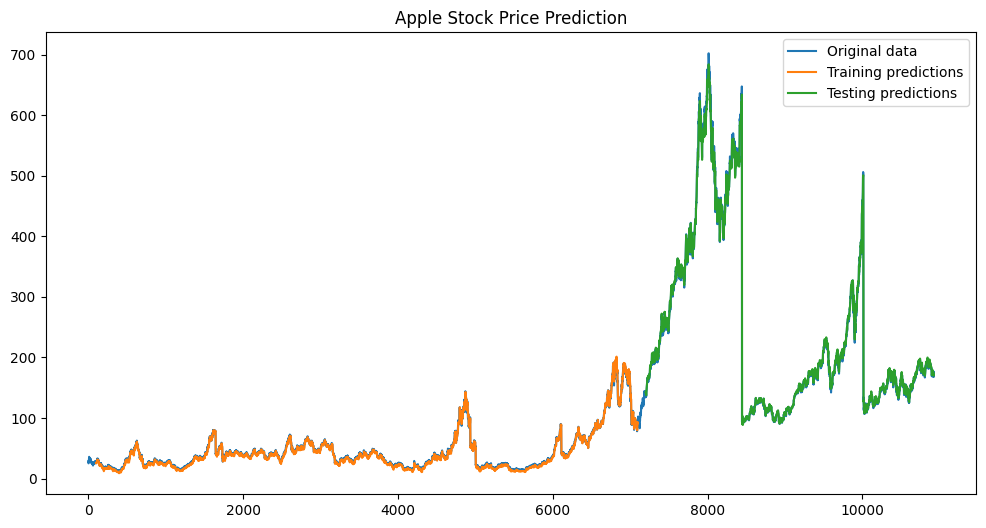

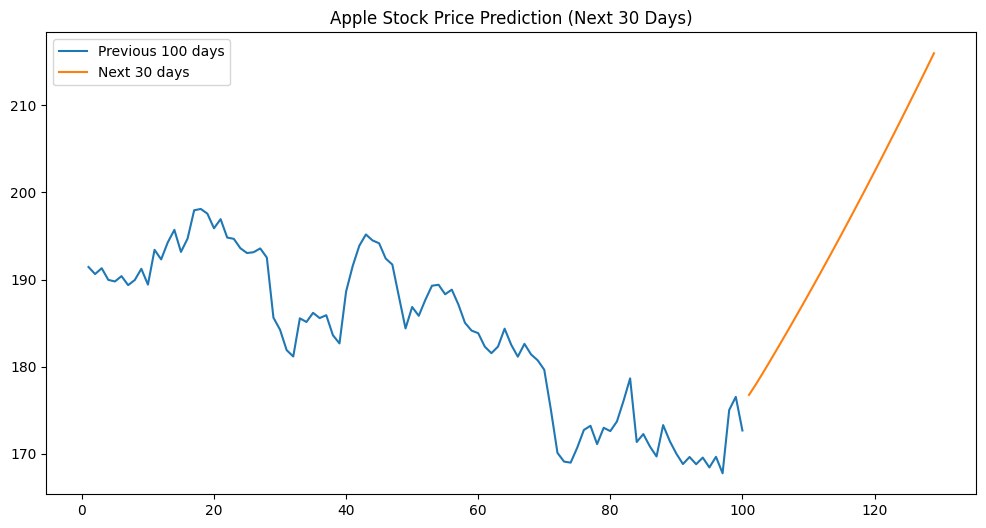

In [ ]:
plt.plot(df3)

NameError: name 'df3' is not defined